In [1]:
#pip install feather-format

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
#import sagemaker
#import boto3
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None) # To display all columns
pd.set_option('display.max_rows',None) # To display all columns
#client = boto3.client('s3')
import feather
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from functools import reduce

In [3]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [4]:
df = pd.read_feather('Data.ftr')

In [5]:
dfu = pd.read_feather('C:/Users/PC1/Desktop/DATASET/Users.ftr')
dfq = pd.read_feather('C:/Users/PC1/Desktop/DATASET/dfq.ftr')

## DATASET

In [6]:
df.head()

,index,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD,correct_answer,bundle_id,explanation_id,deployed_at,correct
0,0,1565096190868,1,5012,b,38.0,1,c,3544,3544,2019-09-17 02:43:28.616,0.0
1,1,1565096221062,2,4706,c,24.0,1,c,3238,3238,2019-10-30 05:34:30.723,1.0
2,2,1565096293432,3,4366,b,68.0,1,b,2898,2898,2019-10-30 05:37:51.451,1.0
3,3,1565096339668,4,4829,a,42.0,1,c,3361,3361,2019-06-24 09:24:51.347,0.0
4,4,1565096401774,5,6528,b,59.0,1,d,5060,5060,2019-10-17 03:03:15.009,0.0


In [7]:
dfu= dfu.sort_values(['user_iD'], ascending=[True])
dfu.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
0,1,1082,753,329,69.593346,36.750
103211,2,1103,765,338,69.356301,24.000
205341,3,10,3,7,30.000000,38.000
305985,4,2699,1932,767,71.582067,27.666
408468,5,1233,754,479,61.151663,23.250


In [8]:
df_85 = dfu.loc[dfu['Percentage'] >= 85]
df_85.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
488880,58,7216,6568,648,91.019956,36.000
3150,103,7,6,1,85.714286,22.000
190937,285,74,73,1,98.648649,0.333
242583,338,928,792,136,85.344828,20.000
264909,360,675,574,101,85.037037,24.333


In [9]:
df_90 = dfu.loc[dfu['Percentage'] >= 90]
df_90.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
488880,58,7216,6568,648,91.019956,36.000
190937,285,74,73,1,98.648649,0.333
708625,853,38,35,3,92.105263,19.000
201669,2962,199,183,16,91.959799,24.000
260175,3554,438,405,33,92.465753,22.000


## PLOTS

<AxesSubplot:xlabel='user_iD'>

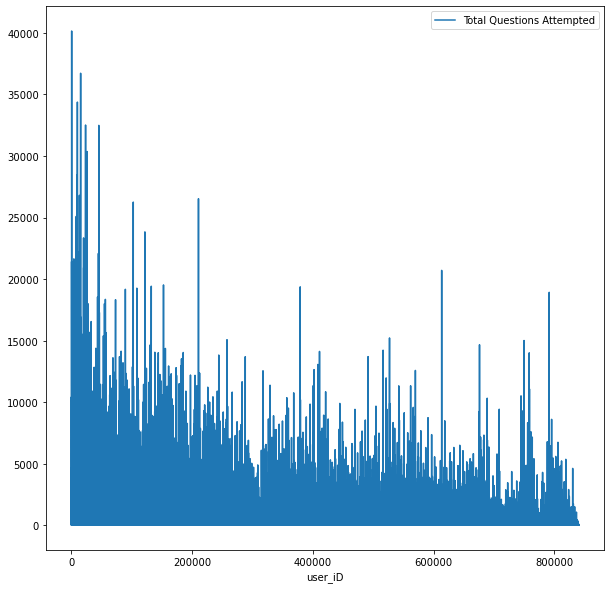

In [43]:
dfu.plot( x='user_iD', y='Total Questions Attempted', figsize = (10,10))

<AxesSubplot:ylabel='Frequency'>

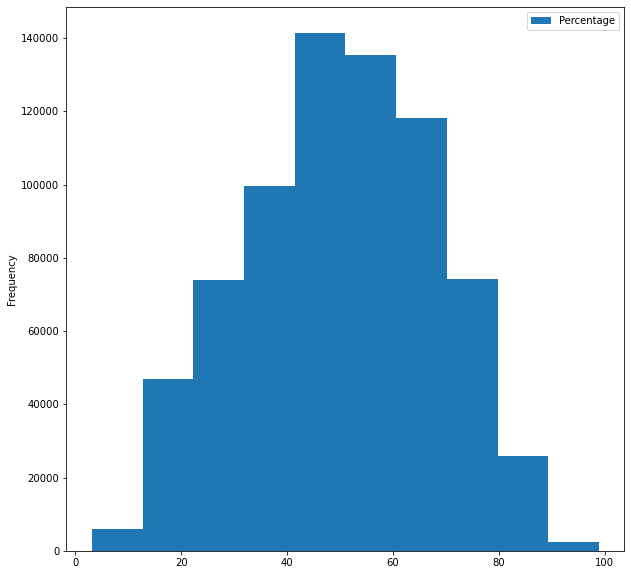

In [44]:
dfu.plot( x='Total Questions Attempted', y='Percentage' , kind ='hist' , figsize = (10,10))

<AxesSubplot:ylabel='Frequency'>

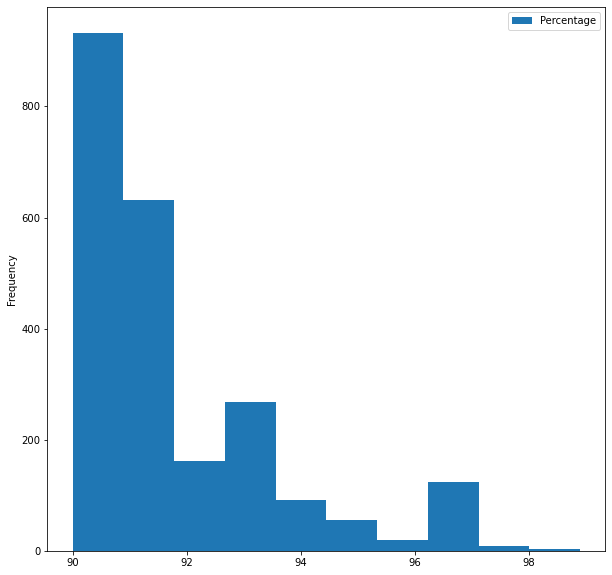

In [45]:
df_90.plot( x='Total Questions Attempted', y='Percentage' , kind ='hist' , figsize = (10,10))

## DESCRIBE THE USERS DATASET QUESTIONS ATTEMPTION

In [13]:
dfu['Total Questions Attempted'].describe()

count    724139.000000
mean        131.371001
std         563.985478
min           2.000000
25%           7.000000
50%          14.000000
75%          41.000000
max       40157.000000
Name: Total Questions Attempted, dtype: float64

## TOP USER 

In [14]:
top_U = dfu.loc[dfu['Total Questions Attempted']== 40157]
top_U 

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
278286,373,40157,32139,8018,80.033369,22.25


## LOWEST USERS

In [15]:
low_U = dfu.loc[dfu['Total Questions Attempted']== 2]
low_U[0:5] 

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
715699,92,2,1,1,50.0,13.0
649148,7552,2,1,1,50.0,28.0
707724,8445,2,1,1,50.0,27.5
717627,9381,2,1,1,50.0,46.5
718413,9454,2,1,1,50.0,11.0


In [16]:
len(low_U)

9731

## REPEATED QUESTIONS COUNT BY EACH USER

In [17]:
df_i = df.groupby(['user_iD', 'question_id']).size().reset_index(name='counts')
df_i.head()

,user_iD,question_id,counts
0,1,7,2
1,1,10,2
2,1,11,1
3,1,13,1
4,1,29,1


## REPEAT QUESTIONS ATLEAST 2

In [18]:
Repeat = df_i.loc[df_i['counts'] > 1]
Repeat.head()

,user_iD,question_id,counts
0,1,7,2
1,1,10,2
7,1,59,2
20,1,150,2
26,1,174,2


## REPEAT QUESTIONS MORE THAN 2

In [19]:
Repeat_2 = df_i.loc[df_i['counts'] > 2]
Repeat_2[0:5]

,user_iD,question_id,counts
33,1,243,4
49,1,485,4
55,1,555,5
64,1,600,3
66,1,667,4


In [20]:
Q555 = df.loc[df['question_id'] == 555]
Q555[0:20]

,index,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD,correct_answer,bundle_id,explanation_id,deployed_at,correct
156,156,1566655050670,147,555,a,22.0,1,c,555,555,2019-06-24 08:47:07.802,0.0
327,327,1567517420484,258,555,b,28.0,1,c,555,555,2019-06-24 08:47:07.802,0.0
681,681,1569287374890,430,555,c,22.0,1,c,555,555,2019-06-24 08:47:07.802,1.0
712,712,1569366821751,451,555,c,31.0,1,c,555,555,2019-06-24 08:47:07.802,1.0
1008,1008,1569568197126,628,555,c,20.0,1,c,555,555,2019-06-24 08:47:07.802,1.0
9376,2989921,1568760029928,881,555,c,16.0,11,c,555,555,2019-06-24 08:47:07.802,1.0
13931,16711066,1562404336767,162,555,c,20.0,16,c,555,555,2019-06-24 08:47:07.802,1.0
37573,65104509,1563762085450,1260,555,c,17.0,53,c,555,555,2019-06-24 08:47:07.802,1.0
45338,69955957,1563456938753,1608,555,c,24.0,58,c,555,555,2019-06-24 08:47:07.802,1.0
55092,76565136,1559798193083,4052,555,c,17.0,67,c,555,555,2019-06-24 08:47:07.802,1.0


## Sorting Dataset w.r.t TIMESTAMP & USERID

In [21]:
df_2 = df.sort_values(['user_iD', 'timestamp'], ascending=[True, True])

In [22]:
df_2.to_feather('FinalData.ftr')

## MIN MAX TIMESTAMP OF EACH USER

In [23]:
df2 = df_2.groupby(['user_iD']).agg(Minimum_Date=('timestamp', np.min), Maximum_Date=('timestamp', np.max)).reset_index()

In [24]:
df2.head()

,user_iD,Minimum_Date,Maximum_Date
0,1,1565096190868,1569647443041
1,2,1506015043018,1567305695137
2,3,1566620784438,1567142294316
3,4,1566782278107,1572041297204
4,5,1546437487910,1567604533505


In [25]:
df2 = df2.rename({'Minimum_Date': 'Min_Time', 'Maximum_Date': 'Max_Time'}, axis=1)
df2.head()

,user_iD,Min_Time,Max_Time
0,1,1565096190868,1569647443041
1,2,1506015043018,1567305695137
2,3,1566620784438,1567142294316
3,4,1566782278107,1572041297204
4,5,1546437487910,1567604533505


## Converting TIMESTAMP TO REAL DATE & TIME

In [26]:
df2['Min_date']= pd.to_datetime(df2['Min_Time'], unit='ms')
df2['Max_date']= pd.to_datetime(df2['Max_Time'], unit='ms')
df2.head()

,user_iD,Min_Time,Max_Time,Min_date,Max_date
0,1,1565096190868,1569647443041,2019-08-06 12:56:30.868,2019-09-28 05:10:43.041
1,2,1506015043018,1567305695137,2017-09-21 17:30:43.018,2019-09-01 02:41:35.137
2,3,1566620784438,1567142294316,2019-08-24 04:26:24.438,2019-08-30 05:18:14.316
3,4,1566782278107,1572041297204,2019-08-26 01:17:58.107,2019-10-25 22:08:17.204
4,5,1546437487910,1567604533505,2019-01-02 13:58:07.910,2019-09-04 13:42:13.505


## CALCULATING DIFFERENCE BETWEEN MIN AND MAX in terms of hours

In [28]:
df2['diff'] = df2['Max_date'] - df2['Min_date']
df2['diff'] = df2['diff'] / np.timedelta64(1, 'h')
#df2['diff']= pd.to_datetime(df2['diff'], unit='ms')

df2.head()

,user_iD,Min_Time,Max_Time,Min_date,Max_date,diff
0,1,1565096190868,1569647443041,2019-08-06 12:56:30.868,2019-09-28 05:10:43.041,1264.236715
1,2,1506015043018,1567305695137,2017-09-21 17:30:43.018,2019-09-01 02:41:35.137,17025.181144
2,3,1566620784438,1567142294316,2019-08-24 04:26:24.438,2019-08-30 05:18:14.316,144.863855
3,4,1566782278107,1572041297204,2019-08-26 01:17:58.107,2019-10-25 22:08:17.204,1460.838638
4,5,1546437487910,1567604533505,2019-01-02 13:58:07.910,2019-09-04 13:42:13.505,5879.734887


In [29]:
df2 = df2.rename({'diff': 'diff_hours'}, axis=1)

In [30]:
df2.head()

,user_iD,Min_Time,Max_Time,Min_date,Max_date,diff_hours
0,1,1565096190868,1569647443041,2019-08-06 12:56:30.868,2019-09-28 05:10:43.041,1264.236715
1,2,1506015043018,1567305695137,2017-09-21 17:30:43.018,2019-09-01 02:41:35.137,17025.181144
2,3,1566620784438,1567142294316,2019-08-24 04:26:24.438,2019-08-30 05:18:14.316,144.863855
3,4,1566782278107,1572041297204,2019-08-26 01:17:58.107,2019-10-25 22:08:17.204,1460.838638
4,5,1546437487910,1567604533505,2019-01-02 13:58:07.910,2019-09-04 13:42:13.505,5879.734887


## CALCULATING DIFFERENCE BETWEEN MIN AND MAX in terms of days

In [32]:
df2['diff_days'] = df2['diff_hours'].div(24)

In [33]:
df2.head()

,user_iD,Min_Time,Max_Time,Min_date,Max_date,diff_hours,diff_days
0,1,1565096190868,1569647443041,2019-08-06 12:56:30.868,2019-09-28 05:10:43.041,1264.236715,52.676530
1,2,1506015043018,1567305695137,2017-09-21 17:30:43.018,2019-09-01 02:41:35.137,17025.181144,709.382548
2,3,1566620784438,1567142294316,2019-08-24 04:26:24.438,2019-08-30 05:18:14.316,144.863855,6.035994
3,4,1566782278107,1572041297204,2019-08-26 01:17:58.107,2019-10-25 22:08:17.204,1460.838638,60.868277
4,5,1546437487910,1567604533505,2019-01-02 13:58:07.910,2019-09-04 13:42:13.505,5879.734887,244.988954


In [35]:
df2['diff_days'].describe()

count    784309.000000
mean         25.826590
std          82.422915
min           0.000000
25%           0.001635
50%           0.006499
75%           2.983404
max         946.089731
Name: diff_days, dtype: float64

In [38]:
df2.to_feather('Time.ftr')

## USERS WHOSE TIMESTAMP ISNT CORRECT

In [36]:
W = df2.loc[df2['diff_days'] == 0]
W[0:20]

,user_iD,Min_Time,Max_Time,Min_date,Max_date,diff_hours,diff_days
673,682,1561593711737,1561593711737,2019-06-27 00:01:51.737,2019-06-27 00:01:51.737,0.0,0.0
1828,1841,1544196032730,1544196032730,2018-12-07 15:20:32.730,2018-12-07 15:20:32.730,0.0,0.0
7206,7237,1567311853461,1567311853461,2019-09-01 04:24:13.461,2019-09-01 04:24:13.461,0.0,0.0
7751,7793,1567338703246,1567338703246,2019-09-01 11:51:43.246,2019-09-01 11:51:43.246,0.0,0.0
7867,7912,1567339923978,1567339923978,2019-09-01 12:12:03.978,2019-09-01 12:12:03.978,0.0,0.0
7938,7985,1567340548340,1567340548340,2019-09-01 12:22:28.340,2019-09-01 12:22:28.340,0.0,0.0
7995,8043,1567341019417,1567341019417,2019-09-01 12:30:19.417,2019-09-01 12:30:19.417,0.0,0.0
8010,8058,1567341133132,1567341133132,2019-09-01 12:32:13.132,2019-09-01 12:32:13.132,0.0,0.0
8057,8107,1567341593208,1567341593208,2019-09-01 12:39:53.208,2019-09-01 12:39:53.208,0.0,0.0
8118,8173,1567342202917,1567342202917,2019-09-01 12:50:02.917,2019-09-01 12:50:02.917,0.0,0.0


In [37]:
len(W)

27372